In [8]:
from shapely import LineString,Point, BufferCapStyle, BufferJoinStyle,MultiPoint, Point
import matplotlib.pyplot as plt
import geopandas as gpd


def show(e):
    p = gpd.GeoSeries(e)
    p.plot()
    plt.show(block=False)

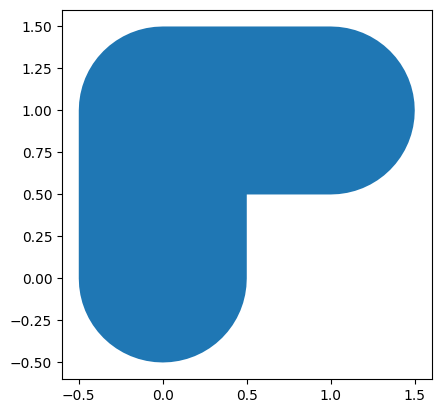

In [2]:
l = LineString([(0, 0), (0, 1), (1, 1)])

a = l.buffer(0.5, cap_style=BufferCapStyle.round, join_style=BufferJoinStyle.round)

show(a)

In [3]:
c=Point(0,0).buffer(5).boundary
l = LineString([Point(-10,-10),Point(0,0),Point(2,2), Point(10,10)])
print(MultiPoint(c.intersection(l)).geoms[0])

POINT (3.5355339059327378 3.5355339059327378)


In [4]:
from typing import Any, ClassVar, Dict, Tuple

# Example from https://github.com/shapely/shapely/issues/1233
class PropertyPoint(Point):

    _id_to_attrs: ClassVar[Dict[str, Any]] = {}

    __slots__ = Point.__slots__  # slots must be the same for assigning __class__ - https://stackoverflow.com/a/52140968

    name: str  # For documentation generation and static type checking

    def __init__(self, coord: Tuple[float, float], name: str) -> None:
        self._id_to_attrs[id(self)] = dict(name=name)

    def __new__(cls, coord: Tuple[float, float], *args, **kwargs) -> "PropertyPoint":
        point = super().__new__(cls, coord)
        point.__class__ = cls
        return point

    def __del__(self) -> None:
        del self._id_to_attrs[id(self)]

    def __getattr__(self, name: str) -> Any:
        try:
            return PropertyPoint._id_to_attrs[id(self)][name]
        except KeyError as e:
            raise AttributeError(str(e)) from None

    def __str__(self) -> str:
        return f"{self.name}, {self.wkt}"


In [5]:
class OrientedPoint1(Point):

    _id_to_attrs: ClassVar[Dict[str, Any]] = {}

    __slots__ = (
        Point.__slots__
    )  # slots must be the same for assigning __class__ - https://stackoverflow.com/a/52140968

    theta: float  # For documentation generation and static type checking

    def __init__(
        self, coord: Tuple[float, float], theta: float = 0.0
    ) -> (
        None
    ):  # if theta is not optional or if the structure of the arguments change (eg: self, x, y, theta) then MultiPoint becomes impossible with OrientedPoint
        self._id_to_attrs[id(self)] = dict(theta=theta)

    def __new__(cls, coord: Tuple[float, float], *args, **kwargs) -> "OrientedPoint1":
        point = super().__new__(cls, coord)
        point.__class__ = cls
        return point

    def __del__(self) -> None:
        del self._id_to_attrs[id(self)]

    def __getattr__(self, name: str) -> Any:
        try:
            return OrientedPoint1._id_to_attrs[id(self)][name]
        except KeyError as e:
            raise AttributeError(str(e)) from None

    def __str__(self) -> str:
        return f"{self.wkt}, theta: {self.theta}"


In [6]:

class OrientedPoint2(Point):

    _id_to_attrs: ClassVar[Dict[str, Any]] = {}

    __slots__ = (
        Point.__slots__
    )  # slots must be the same for assigning __class__ - https://stackoverflow.com/a/52140968

    theta: float  # For documentation generation and static type checking

    def __init__(
        self, coord: Tuple[float, float], theta: float = 0.0
    ) -> (
        None
    ):  # if theta is not optional or if the structure of the arguments change (eg: self, x, y, theta) then MultiPoint becomes impossible with OrientedPoint
        self._id_to_attrs[str(id(self))] = dict(theta=theta)

    def __new__(cls, coord: Tuple[float, float], *args, **kwargs) -> "OrientedPoint2":
        point = super().__new__(cls, coord)
        point.__class__ = cls
        return point

    def __del__(self) -> None:
        del self._id_to_attrs[str(id(self))]

    def __getattr__(self, name: str) -> Any:
        try:
            return OrientedPoint2._id_to_attrs[str(id(self))][name]
        except KeyError as e:
            raise AttributeError(str(e)) from None

    def __str__(self) -> str:
        return f"{self.wkt}, theta: {self.theta}"


In [7]:

class OrientedPoint3(Point):

    _id_to_attrs: ClassVar[Dict[str, Any]] = {}

    __slots__ = (
        Point.__slots__
    )  # slots must be the same for assigning __class__ - https://stackoverflow.com/a/52140968

    theta: float  # For documentation generation and static type checking

    def __init__(
        self,x:float|Tuple[float, float],y:float|None=None, theta: float = 0.0
    ) -> (
        None
    ):  # if theta is not optional or if the structure of the arguments change (eg: self, x, y, theta) then MultiPoint becomes impossible with OrientedPoint
        self._id_to_attrs[id(self)] = dict(theta=(theta if not isinstance(x,Tuple) else y))

    def __new__(cls, x:float|Tuple[float, float],y:float|None=None, *args, **kwargs) -> "OrientedPoint3":
        if isinstance(x,Tuple):
            point = super().__new__(cls, x)
        else:
            point = super().__new__(cls, x,y)

        point.__class__ = cls
        return point

    def __del__(self) -> None:
        del self._id_to_attrs[id(self)]

    def __getattr__(self, name: str) -> Any:
        try:
            return OrientedPoint3._id_to_attrs[id(self)][name]
        except KeyError as e:
            raise AttributeError(str(e)) from None

    def __str__(self) -> str:
        return f"{self.wkt}, theta: {self.theta}"

    @classmethod
    def from_Point(cls, point: Point, theta: float = 0.0):
        return cls((point.x, point.y), theta)


In [8]:

class OrientedPoint4(Point):

    _id_to_attrs: ClassVar[Dict[str, Any]] = {}

    __slots__ = (
        Point.__slots__
    )  # slots must be the same for assigning __class__ - https://stackoverflow.com/a/52140968

    theta: float  # For documentation generation and static type checking

    def __init__(
        self,x_or_coords:float|Tuple[float, float],y:float|None=None, theta: float = 0.0
    ) -> (
        None
    ):  # if theta is not optional or if the structure of the arguments change (eg: self, x, y, theta) then MultiPoint becomes impossible with OrientedPoint
        self._id_to_attrs[str(id(self))] = dict(theta=(theta if not isinstance(x_or_coords,Tuple) else (0.0 if y is None else y)))

    def __new__(cls, x_or_coords:float|Tuple[float, float],y:float|None=None, *args, **kwargs) -> "OrientedPoint4":
        if isinstance(x_or_coords,Tuple):
            point = super().__new__(cls, x_or_coords)
        else:
            point = super().__new__(cls, x_or_coords,y)

        point.__class__ = cls
        return point

    def __del__(self) -> None:
        del self._id_to_attrs[str(id(self))]

    def __getattr__(self, name: str) -> Any:
        try:
            return OrientedPoint4._id_to_attrs[str(id(self))][name]
        except KeyError as e:
            raise AttributeError(str(e)) from None

    def __str__(self) -> str:
        return f"{self.wkt}, theta: {self.theta}"

    @classmethod
    def from_Point(cls, point: Point, theta: float = 0.0):
        return cls((point.x, point.y), theta)


In [9]:
from shapely.ops import nearest_points
from shapely import Polygon

demo = PropertyPoint((1,2),"demo")
p1 = OrientedPoint3((1,2),10)

p2 = Point(5,6)
p3 = Point(5,7)
pFrom = OrientedPoint3.from_Point(p3)
print(demo)
print(demo.name)
print(p1)

print(p1.x, p1.y, p1.theta)

poly = Polygon([[-10,-10],[-10,10],[10,10],[10,-10]])
print(poly.contains(p2))
print(poly.contains(p1))
print(nearest_points(p1, MultiPoint([p2,p3])))


demo, POINT (1 2)
demo
POINT (1 2), theta: 10
1.0 2.0 10
True
True
(<POINT (1 2)>, <POINT (5 6)>)


In [10]:
# MultiPoint (needs theta optional in constructor, because it re-constructs its elements; for example, doesn't work with the example class):
p1copy = Point(p1)
coll = MultiPoint([p1,p2])
print(coll.geoms[0])
print(coll.geoms[1])

print(coll)


POINT (1 2)
POINT (5 6)
MULTIPOINT (1 2, 5 6)


In [11]:
for PointType in [OrientedPoint1,OrientedPoint2,OrientedPoint3, OrientedPoint4]:
    try:
        # Using tuples coords
        p1 = PointType((1,2),3)
        assert p1.x == 1 and p1.y==2 and p1.theta==3, "Tuple with explicit theta"
        p1coll = MultiPoint([p1,p1])
        p1 = PointType((1,2))
        assert p1.x == 1 and p1.y==2 and p1.theta==0, f"Tuple with default theta: theta={p1.theta}"
        p1coll = MultiPoint([p1,p1])
        print("Tuple ok")

        # Using x,y coords
        p2 = PointType(4,5,6)
        assert p2.x == 4 and p2.y==5 and p2.theta==6, "Separate with explicit theta"
        p2coll = MultiPoint([p2,p2])
        p2 = PointType(4,5)
        assert p2.x == 4 and p2.y==5 and p2.theta==0, "Separate with default theta"
        p2coll = MultiPoint([p2,p2])
        print("x,y ok")

        assert nearest_points(p1coll,p2coll)[0].distance(p2)==p2.distance(p1)
        print("Operations ok")

        print(f"{PointType.__name__} fully valid!")

    except Exception as e:
        print(f"{PointType.__name__} not fully valid: {e}")

Tuple ok
OrientedPoint1 not fully valid: 'int' object is not iterable
Tuple ok
OrientedPoint2 not fully valid: 'int' object is not iterable
OrientedPoint3 not fully valid: Tuple with default theta: theta=None
Tuple ok
x,y ok
Operations ok
OrientedPoint4 fully valid!


In [12]:
# The version with explicit conversion to string for dict keys (which solves an ide warning) is a bit slower •`_´•
# The version that supports both (x,y),theta and x,y,theta parameters is also a bit slower

import timeit

setup_base = "from __main__ import Point as PointType"
setup = "from __main__ import OrientedPoint1 as PointType"
setup2 = "from __main__ import OrientedPoint2 as PointType"
setup3 = "from __main__ import OrientedPoint3 as PointType"
setup4 = "from __main__ import OrientedPoint4 as PointType"
statement_base = "p=PointType((13.24,2.5421))"
statement_tuple = "p=PointType((13.24,2.5421), 10.0)"
statement_xy = "p=PointType((13.24,2.5421), 10.0)"
print(timeit.timeit(stmt=statement_base, setup=setup_base, number=10000000))
print(timeit.timeit(stmt=statement_tuple, setup=setup, number=10000000))
print(timeit.timeit(stmt=statement_tuple, setup=setup2, number=10000000))
print(timeit.timeit(stmt=statement_tuple, setup=setup3, number=10000000))
print(timeit.timeit(stmt=statement_xy, setup=setup3, number=10000000))
print(timeit.timeit(stmt=statement_tuple, setup=setup4, number=10000000))

KeyboardInterrupt: 

95.31975777657048
(<POINT (22.5 22.5)>, <POINT (-65.654 -70.12)>)


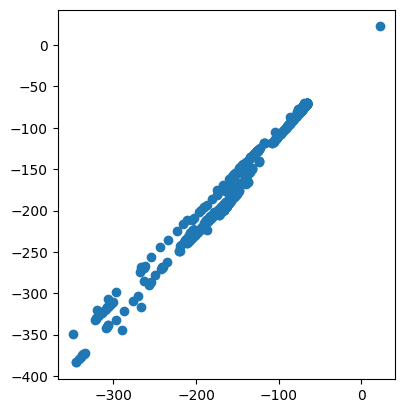

In [9]:
from shapely import Point, MultiPoint, distance
from shapely.ops import nearest_points
import numpy as np

string_coords = "-348.56065693002046 -349.6988387479353, -319.64892350485604 -320.7692459515295, -306.13144577396156 -307.2751590865082, -296.9221600518135 -298.0995366710813, -266.82473145075363 -267.95153413445973, -254.44577897183296 -255.58163983914824, -243.05712859545287 -244.20137661555464, -234.14022177227486 -235.29915272767266, -223.53198975282783 -224.6940757575682, -104.93165398424213 -105.56570824168037, -215.5818443986213 -216.80485997923194, -210.3385489477375 -211.58285051692718, -85.85239340867616 -86.46114083435286, -76.88638088739205 -77.46665501356658, -69.05022465429082 -69.60504010917968, -174.00798963872708 -175.22263400490615, -167.50281461278576 -168.71700932002773, -160.64648982877645 -161.85539221259313, -154.63730683153483 -155.84372441882383, -147.92465812049244 -149.12127847654168, -143.67942868139258 -144.88117824898674, -142.74633531327015 -143.97567841397213, -143.29276277131333 -144.56047028284252, -144.12080066314624 -145.42936282801915, -146.49816177116327 -147.86014725526505, -146.83276165059178 -148.2325085644462, -139.4214807471108 -140.79453148076834, -117.43711916399579 -118.65569365327255, -116.85932329234853 -118.10202145437768, -117.26717183585873 -118.54253069130701, -117.46379014158944 -118.77004565551923, -123.14997437052557 -124.53874111417622, -134.32409789729354 -135.85020691793278, -131.9857302893125 -133.52156446505413, -129.64779901470203 -131.19248667492795, -125.90336552648688 -127.44154378901933, -123.77759763705296 -125.32457031818575, -123.90301114024732 -125.48185419453256, -125.08336334423922 -126.70546448546887, -125.9118464036448 -127.57382044636441, -126.95108755003724 -128.6557178574895, -126.44336354837901 -128.17333834987534, -127.7635153301382 -129.53996153187234, -128.8022583730562 -130.62232055459427, -127.73219377506547 -129.57091676945504, -125.11615838490297 -126.95425324954218, -125.17104731577999 -127.04062537811092, -125.50695329203171 -127.41159963525462, -125.56172365688869 -127.49803978259274, -126.03804160170824 -128.01149156321617, -126.51423559689707 -128.5250197121023, -127.20099990371381 -129.25223148738306, -131.39907391744205 -133.53901197659073, -132.01496957398143 -134.1956722375766, -131.43711176985047 -133.64193840739065, -129.876496462352 -132.09116313917278, -129.86054049303686 -132.1068925638707, -129.00230203034218 -131.26787350934498, -129.47776165745574 -131.78210077413496, -132.26895827099082 -134.64736346386644, -152.04095796290724 -154.75480728896545, -156.37288339421676 -159.19046438202997, -155.79291123462218 -158.6387862355186, -156.686254146735 -159.58359909300722, -154.70358479776974 -157.60631934769876, -152.30046266604188 -155.20098555840457, -152.91333442379118 -155.8605371156083, -156.4009638410892 -159.44340824124683, -157.22363799958777 -160.3174373381734, -153.20884390229685 -156.27121713350311, -147.58252939647673 -150.58388744700153, -154.43369597266977 -157.5912066600895, -143.83249613887875 -146.8382824251968, -138.90966525942326 -141.86170555079207, -138.40227171089126 -141.37889342215325, -137.2644207672724 -140.2538065528599, -137.4577924842864 -140.48435826482824, -137.16083623413806 -140.21535398335428, -136.58372791729346 -139.66082553014556, -137.2673763124249 -140.3910129677466, -137.18059700446776 -140.33607223598517, -138.49415863967008 -141.70905821432257, -139.1073770239502 -142.36825594571792, -262.68844358426384 -268.52403552020036, -261.11891246165277 -266.9818452426323, -262.9788455426207 -268.93946554345774, -265.88798885602654 -271.96915342880664, -145.512548259024 -149.1124906455228, -144.8652190233641 -148.4867396894591, -148.90495711474912 -152.64861081805643, -268.14570517392474 -274.51696221424464, -148.0995632803935 -151.8976643119877, -147.0326687071693 -150.84300070656587, -146.59529734017516 -150.43149926718246, -147.27665327078168 -151.16387748345687, -147.67826771737546 -151.610350370884, -148.49921562064173 -152.48596631450198, -149.18014534058588 -153.21875056546915, -149.6513031010572 -153.7370607929659, -150.401878246664 -154.54158601154904, -151.43176204082368 -155.6324750670789, -151.8326412401083 -156.07960226830582, -153.63059857244198 -157.95791235413176, -181.18225929842873 -186.2626449234435, -189.82068970161154 -195.1586587690949, -190.8458367056215 -196.25412662828137, -194.24474735010034 -199.78376444794824, -196.45601167272594 -202.09703493836915, -321.31605266555295 -330.4980584327443, -322.6056988900443 -331.89424183437774, -320.9649671084694 -330.2816850718644, -318.48731556564536 -327.80899645708433, -316.9170656090356 -326.2673373566729, -204.9435308678506 -211.2796024587217, -186.99739611266813 -192.88323487925473, -170.58906751175277 -176.0601071070117, -171.4053382560132 -176.94014654936564, -174.9402542643672 -180.61645781101086, -306.73519567491843 -316.222162441418, -304.40043671758144 -313.88949410404473, -301.71781600436657 -311.1977481681072, -300.70811847763997 -310.2267103384791, -302.2070106958064 -311.837851026182, -306.9801412152815 -316.82076566335434, -308.8263991908603 -318.79144499890725, -310.32394132651183 -320.4038764679893, -202.1244703303967 -208.99933537907683, -313.66634167821616 -323.9882335290622, -78.47635016042479 -81.65178027829623, -75.88935025603703 -79.0064768950275, -75.46109969309418 -78.58599485061436, -75.10251673259268 -78.23723660330396, -75.64888726208031 -78.82176479524922, -77.09989897328285 -80.33992469268101, -77.71553460297469 -80.99658602326998, -77.426465120226 -80.71971596886569, -75.74589898915977 -79.00625126265207, -75.94406773382775 -79.23196502267493, -76.00307120085998 -79.3140389485689, -75.85336991360003 -79.18060173117908, -75.42552814438726 -78.7596816409226, -74.78916274685179 -78.12309633773769, -74.63962614719449 -77.98949352182053, -74.1425177189028 -77.49645321219529, -74.13210702053534 -77.50652222367033, -73.98270122384447 -77.372786744589, -73.69430899540889 -77.09521718434586, -73.40596036619529 -76.81762466745364, -73.39564289533381 -76.82759541366777, -72.82947302729735 -76.26220946916132, -72.47181842634063 -75.91251393650708, -72.32266166339402 -75.77852567366548, -72.31244948780854 -75.78838665683575, -71.95495243778647 -75.43853295368348, -71.73643856157747 -75.23249126227424, -71.3790947842874 -74.88248563051143, -71.5078076272484 -75.0362087795315, -70.94228627738372 -74.47018075967641, -71.07101179248939 -74.62388771632173, -70.78328813746434 -74.34566781483471, -70.49562185455822 -74.06739063031164, -70.48555945224966 -74.07708925770092, -70.26735874426817 -73.87072972272237, -70.1185840520331 -73.73634914012335, -70.24729648483503 -73.8900568830994, -69.95981186277344 -73.61157366072268, -69.39496062651273 -73.0448821522764, -69.3850020822989 -73.05446899483513, -69.30572984480158 -72.99198599089266, -69.01842980606743 -72.71331728015123, -68.86987469854819 -72.57871167035803, -69.20658939667022 -72.9485929215508, -68.642132882204 -72.38150992625269, -68.70157506835135 -72.4630904728288, -68.69169885742839 -72.47258455593372, -68.68179844299955 -72.48209997373827, -68.11764646130851 -71.91471651344699, -68.10782581896274 -71.92415143110996, -68.02871811734497 -71.86149092981034, -68.29594674478803 -72.15943340124073, -67.87054571392635 -71.73608056642188, -67.37601355940402 -71.2404825967476, -67.50473928464957 -71.39414278673799, -67.77188575038642 -71.69217762734093, -67.4159604664545 -71.34075072918375, -67.12931914601732 -71.06141846005389, -67.5348310620414 -71.503856007309, -67.04062979887834 -71.00792918413474, -67.03090104491376 -71.01725497462053, -66.88276233876618 -70.88219200044637, -66.8038711429063 -70.81930094318233, -67.27837879356233 -71.33410184775637, -66.9227596916809 -70.9823662364659, -66.29060182816917 -70.34162793790904, -66.21176142831933 -70.27865955730051, -67.03184315187676 -71.15480959855648, -66.53813863386684 -70.65838990509967, -66.32102968695855 -70.45091470536296, -66.58785534496195 -70.74922847370794, -66.50903300141569 -70.68623340342597, -66.29198718309569 -70.47869216395006, -66.42051179529697 -70.6325090808855, -66.41082108504504 -70.64177203804604, -66.60836750392477 -70.86795384948732, -66.04602993965582 -70.2987997651107, -65.89820926131803 -70.16342343322347, -66.0266924910153 -70.31727051583836, -65.80986083262592 -70.10951148838434, -66.0763945555713 -70.40806435857776, -66.13577305591716 -70.4896374980048, -66.05705768861024 -70.42651955816957, -66.25444992580043 -70.65283352757943, -66.24475715696758 -70.6620796579358, -65.82099231625219 -70.23711966001812, -66.4323647777009 -70.8977198433698, -65.80166738677978 -70.25554475318464, -65.65400199747255 -70.11997854204118, -65.98928090910121 -70.49114696943003, -66.6693665320768 -71.22440240029212, -66.31474866841752 -70.87165931292125, -65.89127098564644 -70.44641252062412, -66.15741160920135 -70.74531582185045, -66.07873561750264 -70.68213782882309, -66.20691672593412 -70.8362411166475, -66.05934320791765 -70.70059349721664, -66.66995207589125 -71.36192135072756, -65.90209147222194 -70.57415003999988, -66.3058714338576 -71.01816412379414, -66.84733218994748 -71.6072166827875, -66.69975404057692 -71.47156405782997, -66.27663346174721 -71.0459587067038, -66.47353448964616 -71.27268172116202, -66.94590065593744 -71.78946922350843, -66.31626959929574 -71.14622446300378, -67.06397588373035 -71.95315120427954, -67.3984077227192 -72.32509147806827, -67.38852229528932 -72.33447554181942, -66.55262252464208 -71.47340207984999, -67.16230527857421 -72.13556429659245, -67.29008068098021 -72.29002288237942, -67.00496826226149 -72.00914904801621, -67.68318610791226 -72.74413634966834, -67.32928259917375 -72.39067078334621, -67.3882103433878 -72.47260850745756, -67.24073145795755 -72.33681217636372, -67.64353835236496 -72.78171597701864, -67.70240438673623 -72.86370646808726, -68.38009379380156 -73.59918311993388, -68.16383357818714 -73.3908029899942, -68.36011018083849 -73.61810511198806, -67.93764405099303 -73.19181988870365, -68.68376673189924 -74.0002155696253, -68.74243099510032 -74.0823645564125, -68.59495527428228 -73.94656899512121, -68.92848576099166 -74.31932706324892, -69.19322016182286 -74.61952092401563, -69.66399996734553 -75.13774488796352, -69.03564277678525 -74.49324708951002, -69.43763280997271 -74.93889887950921, -69.15281171989831 -74.65771279144128, -70.44738543058176 -76.04848645311797, -69.40722481790704 -74.96762426996632, -70.97610286911446 -76.64953778216925, -70.2107025419646 -75.8593638434624, -70.26910000493176 -75.94176257336846, -70.67065734365171 -76.38780930626669, -70.52310504365687 -76.25203974838793, -71.13039113806036 -76.91643444434582, -71.53170646242631 -77.36268259813887, -71.38410987774614 -77.2269698419872, -71.85390276514387 -77.7460980151736, -72.11784167493629 -78.04701139245947, -72.24453027949943 -78.20243309243268, -72.37121295570579 -78.3578583733941, -72.703558926521 -78.73169512300395, -72.55591185436232 -78.59601792923401, -73.0938093195614 -79.18836940850805, -73.28884362261473 -79.416768140184, -73.27826278661512 -79.42672700586176, -73.47326396405829 -79.6551738194998, -74.28486688184631 -80.53920332964083, -74.06863361862652 -80.33073238724465, -74.33198571128065 -80.63217603861968, -74.9377291120318 -81.29797043652493, -75.40638580781521 -81.81813986718771, -74.98467199247656 -81.39109627481463, -75.17929356641213 -81.61988573187912, -75.30542312519299 -81.77580293154436, -76.04766225538634 -82.58776533642073, -76.10519169578885 -82.67093066686357, -76.29962026479011 -82.89989311491149, -76.56240970783487 -83.20182587560382, -77.37262442714645 -84.0871559537159, -77.29314264658521 -84.0245979927712, -77.55572911494814 -84.32671492305727, -77.95510717231083 -84.7747507723793, -78.35439548137418 -85.22286867597921, -78.89035337348422 -85.81699895460412, -79.01589493171255 -85.97344483363769, -79.55168475985465 -86.56772836962611, -79.95057670523637 -87.01618833560752, -80.28104738419503 -87.39173039724444, -80.33799270315944 -87.47541586663584, -80.94173666114052 -88.1430441221269, -81.40866425986837 -88.66479323041607, -81.73879267563673 -89.04064707277975, -81.79556809673427 -89.1244828635613, -82.46719211569865 -89.8655247601979, -82.59215839535018 -90.02250845738793, -83.05863633797455 -90.54466732481082, -83.79820653522557 -91.35910461587629, -83.92296624652872 -91.51625390501347, -84.66226453274764 -92.33092003762661, -85.12828349805632 -92.8535199231182, -85.25287506831141 -93.01081958520292, -85.85525821386383 -93.67969389881209, -86.45748889352319 -94.34872921926846, -86.58188448484137 -94.50620508915644, -86.84273442411654 -94.80991510570091, -87.71755946976342 -95.7716472475207, -87.97822184586502 -96.07552770907472, -88.579894147586 -96.74505183137077, -88.90857199425648 -97.12222249136023, -89.57821017745232 -97.86510388442912, -90.11131324564322 -98.46184266054371, -90.57607633669012 -98.98556600917534, -91.17711995655463 -99.65566460663642, -91.77800947955892 -100.32592528094212, -92.51511004023547 -101.1426050457941, -92.97942322726198 -101.66673803886725, -93.44361147144724 -102.1910058234932, -94.04399631785738 -102.86170605145934, -94.71238515164508 -103.60572992256797, -95.1762205799231 -104.13031881439085, -95.77620849168686 -104.80138113489363, -96.64851694904627 -105.7654407872104, -96.8395515335333 -105.99746928038115, -97.77963682887919 -107.03504035153856, -98.37903149669108 -107.70664444925691, -98.63792042343172 -108.01213046247352, -99.64555852612075 -109.12341848853376, -100.3126123690297 -109.8686613349362, -100.84342998303325 -110.46748271458125, -101.57828812950211 -111.28623178518345, -102.24489939380013 -112.0318779637121, -103.11550934240401 -112.99749061207018, -104.12198392310657 -114.10986458985676, -104.65204129260204 -114.70937876650089, -105.59009949374467 -115.74880430829197, -106.79995371595066 -117.08171375421472, -107.8735628033036 -118.26818880233901, -107.58707571838028 -117.9883469113777, -106.68873314543305 -117.04846489948406, -106.26647426252754 -116.62176771903029, -106.93183396504588 -117.36854833847386, -262.62199004145623 -285.4381022789341, -155.89933318673732 -170.28917405749604, -156.55903145669137 -171.04119034364243, -157.62618415518327 -172.23364393129597, -158.3534745152148 -173.05936001239826, -159.0126895696666 -173.81185403510818, -159.80751119139282 -174.7112844302406, -160.60222055358258 -175.61085647124025, -161.1250685868758 -176.21697788575915, -162.12312825275293 -177.33709061158714, -206.9645346407757 -227.66866578364713, -206.73607728131554 -227.47116439896163, -206.16951556600583 -226.90526175408536, -205.46793204148608 -226.19183533535488, -205.10448679779327 -225.8467281035389, -204.06514634631276 -224.76461837574087, -203.36400393653648 -224.05077309921714, -203.3387669733692 -224.07391146470076, -203.04319897943148 -223.80222949006594, -202.7477477855133 -223.53043574905772, -202.51983173101712 -223.33235380520512, -202.6297676636967 -223.50289510058323, -202.53704364451937 -223.45220799373726, -202.57934317994543 -223.54907474739196, -202.41910183674955 -223.42460404941787, -202.52896859736754 -223.59518991528805, -202.77374849343633 -223.91338931161678, -203.15353585070432 -224.37915726624263, -203.73570362203517 -225.06635869618617, -204.52014526209646 -225.9751323746588, -204.8320856950396 -226.36737209552317, -205.818701360027 -227.4978045023285, -206.3327556385723 -228.1117578913979, -207.52133007864188 -229.4640042795577, -208.77700402643282 -230.8903605440859, -210.09989724824123 -232.39075851560318, -211.08532038842762 -233.5222152364767, -213.4189783393717 -236.13091560368048, -214.9431390739985 -237.85375338167307, -218.21966932575066 -241.49736521392379, -219.47326730728764 -242.92558748107678, -308.4653751991213 -341.4984222930697, -306.0057677244512 -338.86922891569435, -305.90152129856267 -338.8288625336796, -307.88292082260057 -341.08194293701007, -335.9508968836393 -373.0021694931081, -337.7913502333552 -375.11300881599595, -336.67620391149126 -373.96437625955207, -334.62099724672936 -371.77826092071615, -344.90597536977486 -383.3755249592408, -345.06596362565466 -383.6353620360616, -341.60152592291035 -379.8922999094386, -339.211514905783 -377.3347805740221, -234.48927305154558 -261.7092893718279, -241.1026493467839 -269.0764268892208, -248.98930079748584 -277.85383106362, -241.98217678245663 -270.16862516280594, -240.47657287334442 -268.56399573574765, -240.31270576795066 -268.4425548334639, -241.35588825872264 -269.65635279764246, -287.4411090003903 -321.41420785904006, -137.5314499818509 -155.24101556552054, -132.62506583675665 -149.83564547957877, -132.74124302401128 -150.0001598149986, -131.92013497767633 -149.12477000869268, -297.0383165051113 -332.4192345290659, -275.8521108639704 -308.9734381484451, -270.33052781420633 -302.91094141835424, -124.02040568655309 -140.49382867576125, -123.60214563057147 -140.0630432508078, -124.18752763117885 -140.74704099710573, -136.00498888248904 -154.05874741178147, -135.3851432802021 -153.40575351294666, -135.23338228691068 -153.27327071927434, -187.3264600093228 -211.32767958124847, -186.9683114977863 -210.9772516675428, -186.008961492034 -209.95712472724153, -178.30203252729976 -201.42165563627012, -147.81723514764138 -167.50943811161105, -146.99620420568576 -166.6339107225964, -149.8486226584846 -169.85171993808382, -257.2771298952874 -289.63458528569845, -255.84301075768218 -288.0998926404346, -254.20896108029018 -286.3416230805417, -141.09114350538027 -160.24353153310528, -138.40239835299883 -157.28189771868608, -140.6531208256409 -159.8304347781936, -190.28466188408467 -215.25669250916542, -188.72561027736253 -213.56543178194448, -183.43055156832133 -207.70251687390237, -181.20549725180007 -205.26529629175837, -182.5829526175374 -206.85073944294768, -184.02671331167195 -208.5110046581029, -185.27015669912956 -209.9480000943926, -186.64664117043822 -211.53425842097397, -188.22278313794044 -213.34445020451764, -198.06524700076992 -224.39739305966734, -220.10400482076918 -249.0936442128334, -219.87619932048003 -248.8948749456501, -220.1150150547201 -249.21790680995343, -210.77056485963874 -239.19506705411516, -211.01011153220406 -239.51744225014085, -210.1178695370136 -238.5713111236177, -209.29242888917068 -237.69955798442618, -208.4671049048065 -236.82769594318154, -207.44239517215533 -235.73169043827357, -207.08328637641716 -235.3819879889872, -205.92584031233042 -234.13639364841185, -205.3674095482322 -233.5624862580072, -204.34346455012687 -232.46573917742165, -203.4527261693153 -231.51822918811803, -202.36273206001303 -230.34641939260237, -201.73843135827062 -229.69723937489155, -201.18067237797183 -229.12266916619777, -200.4236901502496 -228.32385213092073, -199.73332539210398 -227.59957756378776, -198.8436518296126 -226.6510506890982, -198.15362846026227 -225.9265039854954, -197.53010480956533 -225.27656375559644, -196.64104269637423 -224.3275200709494, -195.75215493273188 -223.37827598194315, -195.32837890445506 -222.95217946636083, -194.77193004741807 -222.37644334884874, -194.01638170697925 -221.57630993593, -193.1281083136762 -220.62650175316415, -192.5720568299582 -220.05035826549886, -191.94975446139148 -219.3993372753422, -191.12840075411322 -218.52387636960538, -190.5727443591039 -217.94736870317632, -189.81808761725492 -217.14641673024522, -189.26271247831787 -216.56969141023433, -188.84014060390237 -216.14248084790475, -188.21856628208616 -215.49074632773676, -187.53086695654338 -214.76402290495398, -187.1086146454512 -214.33651577970807, -186.22218176487843 -213.3850665005773, -185.60123776143448 -212.73279649704395, -185.17932790682 -212.30497281059542, -184.29339741783411 -211.35306535947495, -183.93798976949088 -210.9998832375044, -183.3175046087781 -210.34718948870415, -182.63093385903923 -209.61943153945634, -182.40837342059714 -209.41579860372497, -181.92075617054638 -208.9125542618389, -181.49957265983502 -208.4840981762333, -181.01221197953777 -207.98061832542638, -180.32620533633832 -207.25233992831986, -179.64040396183975 -206.5238758019031, -179.48451705829856 -206.3947570538894, -178.60025293046218 -205.44128754772188, -178.5769017544394 -205.4619167499553, -177.82538541268036 -204.6580486113285, -177.404943027351 -204.22890358073437, -176.9846242649946 -203.79960448327046, -176.167295383635 -202.92042310427854, -176.0780297603996 -202.8658206883145, -175.72414827801052 -202.51125817078594, -175.10568803416166 -201.8567028244367, -174.68583780933446 -201.42696944728442, -174.1999574360859 -200.9221642756136, -173.84637121307756 -200.56732475405144, -173.29454005139098 -199.98729236318806, -172.87506179287035 -199.5572145653285, -172.52172832960167 -199.20213991566922, -172.03633971948577 -198.69688077589157, -171.48490851559063 -198.11652026031484, -171.3961932106624 -198.06134673800264, -170.9110800213963 -197.5558328259452, -170.5581401390183 -197.20039114584853, -169.94109407691155 -196.54454053844722, -169.65444156557285 -196.26397260652118, -169.3017269456518 -195.9082799082278, -168.9491794792177 -195.55251744142146, -168.8607974503329 -195.49706300970408, -168.57430024789443 -195.2163017268106, -167.9578865998027 -194.55991142119666, -167.53954561171406 -194.12877605923157, -167.25335119380773 -193.84777728474964, -167.0331903775498 -193.6418390734484, -166.4831054147485 -193.06019745309607, -166.46100885074 -193.07959891382734, -166.04309873619937 -192.64806519849049, -165.88908353093754 -192.51715853238787, -165.40538533521064 -192.01033681299594, -164.98772077425062 -191.57857574527338, -164.7678983609312 -191.3723127512119, -164.41632380689612 -191.015599578644, -163.998917402202 -190.58364089213143, -164.04291884820276 -190.67801888787565, -163.62563819577935 -190.24594212792906, -163.34018234874327 -189.96424395501467, -163.12071243788557 -189.75764841295492, -162.7695303028824 -189.40056783934816, -162.68187303338775 -189.34439824006637, -162.46255470068024 -189.13769882768327, -162.04568465658318 -188.7051984659008, -161.6288734387271 -188.2726832880451, -161.73894172716837 -188.44210246465275, -161.45396410252138 -188.15995445795704, -161.23480936712966 -187.95305193074785, -161.4107113442933 -188.19778050011968, -160.5992645314948 -187.31324265190858, -160.3803151361348 -187.106149000602, -160.2930378960775 -187.0496487729768, -160.4030927395364 -187.21909320897453, -159.72374003937767 -186.48472793340866, -160.42584261685633 -187.33196520700022, -159.35195953390348 -186.14553789447803, -159.19905192004202 -186.01356044327378, -159.11191114702686 -185.9568775218985, -158.82750169184928 -185.67418692098738, -158.93763953327382 -185.84353205519437, -159.17919556686027 -186.16361135660827, -158.434763005016 -185.3532364699068, -158.28202736842948 -185.22108609551347, -158.19498270162947 -185.1643369435237, -157.97657198899094 -184.9567195951528, -158.6122276239685 -185.72920980956576, -158.19670699805243 -185.2954425101237, -157.64996278793083 -184.71072341314957, -158.5481106440008 -185.78505895584166, -158.06707552495504 -185.27576196200474, -157.25790142392995 -184.38916103088275, -157.4336171681204 -184.63392362549945, -157.08412669787796 -184.27524320482988, -157.45671582190158 -184.74638698076743, -157.82916121159835 -185.21765199797645, -157.0860727251045 -184.40609379754918, -157.13046607198103 -184.50001603120438, -157.04358169337183 -184.44303369710977, -157.08795598305727 -184.53696493598477, -156.80438313589306 -184.25346601706667, -156.8486914110052 -184.34740662851695, -157.08975644883526 -184.66783355280435, -156.6095811388005 -184.15773960958137, -157.11279167488772 -184.78031671660509, -156.5015888016338 -184.11905671735354, -157.0046606800903 -184.7417062032437, -156.78681791973167 -184.53355207314146, -156.37243303837565 -184.09871777686155, -156.5477378780705 -184.34377311275003, -156.91958496560483 -184.81550094372125, -156.50530942214542 -184.38056051433816, -156.15659212845847 -184.0211771684109, -156.98672684651083 -185.02199375151048, -156.57256832346292 -184.58694058171187, -157.14053606462107 -185.28569117770428, -156.92282509252 -185.07734841724948, -157.4251755078264 -185.70058171405284, -157.33834238836658 -185.64351947292786, -156.46626002323012 -184.6789920406001, -150.35972651131507 -177.66466469978624, -148.11472164331124 -175.11106973487895, -149.0757249952529 -176.26314917457725, -148.66282019806124 -175.82697747278837, -148.57706387939436 -175.768921039245, -149.34144025808533 -176.69434595733946, -149.45173541008762 -176.86338325396474, -149.5620461904907 -177.03240341536554, -150.2606629013547 -177.88251110453766, -150.10932061016464 -177.7489397387393, -151.1344759086825 -178.97768602563795, -150.78701607282852 -178.61710384987586, -150.83172772861602 -178.71062026532144, -151.39907819713505 -179.40979724856888, -151.63961335948738 -179.730563647516, -152.27204383543545 -180.50566698127622, -152.44716129832267 -180.75082400920775, -152.81808060823167 -181.22325324930893, -152.66658637428995 -181.08977996892568, -153.36386288083273 -181.94100388311043, -153.40812693255546 -182.03487689991374, -154.49675194135466 -183.34086503253224, -154.34505493267554 -183.20755164549476, -155.17229898295358 -184.21079333905922, -155.6730791650289 -184.83528083928186, -158.3918875223906 -188.03668468686647, -159.2183225990795 -189.04057132122378, -159.9141171733896 -189.8930414647853, -159.4357780934724 -189.3811888097952, -159.67489060146076 -189.70312455900856, -160.174745279048 -190.32838575264452, -159.7617220859456 -189.89225181408247, -160.06586161595195 -190.29011449383643, -160.10922905579994 -190.38471003849688, -160.8042438796197 -191.23782378794755, -160.6519962130125 -191.10493475240318, -160.95584722174172 -191.5031104155128, -160.7384509560903 -191.29433953910277, -161.3027969191111 -191.99600885757425, -161.28075647330195 -192.014929826808, -157.80710546787142 -188.01183514283395, -150.49234408609428 -179.53040646116142, -151.38312629958523 -180.6108362521884, -160.99743163822404 -191.86275014183968, -162.47262571028205 -193.6275705607426, -162.58060139437742 -193.79845752805628, -162.75365987438371 -194.04523095418952, -163.12184453905155 -194.51989690294067, -163.16464805128854 -194.61487798624833, -163.66285513950393 -195.24151990623963, -163.77057002243956 -195.41257057155832, -163.81329967670405 -195.50768353120714, -164.50630279705297 -196.3624124440796, -164.6789067632295 -196.6095879033402, -164.78647392204041 -196.78074928407628, -165.6091216084134 -197.78777350286686, -165.91152382206604 -198.1871126260363, -166.5388529430362 -198.96643723578387, -166.45111374404567 -198.9098806269074, -167.14319847979664 -199.76540769698505, -166.47070853910415 -199.02469722411814, -162.80998449897066 -194.78676768984337, -162.4629331544881 -194.42564165581283, -167.2468659378484 -200.07141652612168, -162.74311181544996 -194.84389346739704, -163.43507988217672 -195.69945637077723, -164.32166376311096 -196.78334786833503, -163.58506146355967 -195.96589011154057, -163.1732083414826 -195.52856985809044, -163.60516371743924 -196.08016199936483, -166.24339693910483 -199.21877780867587, -170.63295394813082 -204.41228678849905, -171.5828347287508 -205.57360883242612, -171.81895067058102 -205.89793622576656, -266.1718010336112 -316.6579968376371, -137.463463199705 -165.6721814261631, -137.6386680144187 -165.91699123820533, -139.56454904532063 -168.21738661917615, -289.95632866618246 -344.8704356565529, -186.19917598037813 -223.07365864014636"


coords = [[float(val) for val in point.split(" ")] for point in string_coords.split(", ")]

m1 = Point([22.5,22.5])
m2 = MultiPoint(coords)

print(np.std([distance(m1,geom) for geom in m2.geoms]))

print(nearest_points(m1,m2))

show([m1,m2])

In [6]:
import numpy as np
from shapely import MultiPoint

def pol_to_abs_cart(polars: np.ndarray):
	return MultiPoint(
		[
			(
				(
					25
					+ np.cos(0 + polars[i, 0])
					* polars[i, 1]
				),
				25
				+ np.sin(0 + polars[i, 0])
				* polars[i, 1],
			)
			for i in range(len(polars))
		]
        )

print(pol_to_abs_cart((np.asarray([[-2.354673385620117, 529.0999755859375], [-2.35457181930542, 488.20001220703125], [-2.3544704914093018, 469.1000061035156], [-2.3543691635131836, 456.0999755859375], [-2.3542675971984863, 413.5000305175781], [-2.354166269302368, 396.0], [-2.354064702987671, 379.8999938964844], [-2.3539633750915527, 367.3000183105469], [-2.3538620471954346, 352.29998779296875], [-2.3537604808807373, 184.1999969482422], [-2.353659152984619, 341.1000061035156], [-2.353557825088501, 333.6999816894531], [-2.3534562587738037, 157.1999969482422], [-2.3533549308776855, 144.5], [-2.3532536029815674, 133.39999389648438], [-2.35315203666687, 282.29998779296875], [-2.353050708770752, 273.1000061035156], [-2.3529491424560547, 263.3999938964844], [-2.3528478145599365, 254.90000915527344], [-2.3527464866638184, 245.39999389648438], [-2.352644920349121, 239.40000915527344], [-2.352543592453003, 238.10000610351562], [-2.3524422645568848, 238.89999389648438], [-2.3523406982421875, 240.10000610351562], [-2.3522393703460693, 243.5], [-2.352138042449951, 244.0], [-2.352036476135254, 233.5], [-2.3519351482391357, 202.3000030517578], [-2.3518335819244385, 201.50001525878906], [-2.3517322540283203, 202.09999084472656], [-2.351630926132202, 202.39999389648438], [-2.351529359817505, 210.5], [-2.3514280319213867, 226.39999389648438], [-2.3513267040252686, 223.09999084472656], [-2.3512251377105713, 219.79998779296875], [-2.351123809814453, 214.5], [-2.351022481918335, 211.5], [-2.3509209156036377, 211.70001220703125], [-2.3508195877075195, 213.40000915527344], [-2.3507182598114014, 214.59999084472656], [-2.350616693496704, 216.10000610351562], [-2.350515365600586, 215.40000915527344], [-2.3504137992858887, 217.3000030517578], [-2.3503124713897705, 218.8000030517578], [-2.3502111434936523, 217.3000030517578], [-2.350109577178955, 213.59999084472656], [-2.350008249282837, 213.70001220703125], [-2.3499069213867188, 214.1999969482422], [-2.3498053550720215, 214.29998779296875], [-2.3497040271759033, 215.00001525878906], [-2.349602699279785, 215.70001220703125], [-2.349501132965088, 216.70001220703125], [-2.3493998050689697, 222.6999969482422], [-2.3492982387542725, 223.60000610351562], [-2.3491969108581543, 222.79998779296875], [-2.349095582962036, 220.60000610351562], [-2.348994016647339, 220.60000610351562], [-2.3488926887512207, 219.39999389648438], [-2.3487913608551025, 220.09999084472656], [-2.3486897945404053, 224.09999084472656], [-2.348588466644287, 252.3000030517578], [-2.348487138748169, 258.5], [-2.3483855724334717, 257.6999816894531], [-2.3482842445373535, 259.0], [-2.3481829166412354, 256.20001220703125], [-2.348081350326538, 252.80001831054688], [-2.34798002243042, 253.6999969482422], [-2.3478784561157227, 258.6999816894531], [-2.3477771282196045, 259.8999938964844], [-2.3476758003234863, 254.20001220703125], [-2.347574234008789, 246.19998168945312], [-2.347472906112671, 256.0], [-2.3473715782165527, 240.89999389648438], [-2.3472700119018555, 233.89999389648438], [-2.3471686840057373, 233.1999969482422], [-2.347067356109619, 231.60000610351562], [-2.346965789794922, 231.89999389648438], [-2.3468644618988037, 231.5], [-2.3467628955841064, 230.6999969482422], [-2.3466615676879883, 231.6999969482422], [-2.34656023979187, 231.60000610351562], [-2.346458673477173, 233.5], [-2.3463573455810547, 234.40000915527344], [-2.3461544513702393, 411.0], [-2.346053123474121, 408.79998779296875], [-2.345951795578003, 411.4999694824219], [-2.3458502292633057, 415.70001220703125], [-2.3457489013671875, 243.6999969482422], [-2.3456473350524902, 242.8000030517578], [-2.345546007156372, 248.60000610351562], [-2.345444679260254, 419.1000061035156], [-2.3453431129455566, 247.49998474121094], [-2.3452417850494385, 246.0], [-2.3451404571533203, 245.39999389648438], [-2.345038890838623, 246.39999389648438], [-2.344937562942505, 247.0], [-2.3448362350463867, 248.20001220703125], [-2.3447346687316895, 249.20001220703125], [-2.3446333408355713, 249.90000915527344], [-2.344532012939453, 251.0], [-2.344430446624756, 252.50001525878906], [-2.3443291187286377, 253.09999084472656], [-2.3442275524139404, 255.6999969482422], [-2.344024896621704, 295.1999816894531], [-2.343923330307007, 307.6000061035156], [-2.3438220024108887, 309.1000061035156], [-2.3437206745147705, 314.0], [-2.3436191082000732, 317.1999816894531], [-2.343111991882324, 496.29998779296875], [-2.343010663986206, 498.1999816894531], [-2.342909336090088, 495.9000244140625], [-2.3428077697753906, 492.39996337890625], [-2.3427064418792725, 490.1999816894531], [-2.3426051139831543, 329.6999816894531], [-2.342503547668457, 304.0], [-2.342402219772339, 280.5], [-2.3423008918762207, 281.6999816894531], [-2.3421993255615234, 286.79998779296875], [-2.3420979976654053, 475.8999938964844], [-2.341996431350708, 472.5999755859375], [-2.34189510345459, 468.8000183105469], [-2.3417937755584717, 467.39996337890625], [-2.3416922092437744, 469.6000061035156], [-2.3415908813476562, 476.5], [-2.341489553451538, 479.1999816894531], [-2.341387987136841, 481.4000244140625], [-2.3412866592407227, 326.1000061035156], [-2.3411853313446045, 486.29998779296875], [-2.3410837650299072, 148.59999084472656], [-2.340982437133789, 144.89999389648438], [-2.340881109237671, 144.3000030517578], [-2.3407795429229736, 143.8000030517578], [-2.3406782150268555, 144.59999084472656], [-2.340576648712158, 146.6999969482422], [-2.34047532081604, 147.59999084472656], [-2.340373992919922, 147.1999969482422], [-2.3402724266052246, 144.79998779296875], [-2.3401710987091064, 145.09999084472656], [-2.3400697708129883, 145.1999969482422], [-2.339968204498291, 145.0], [-2.339866876602173, 144.39999389648438], [-2.3397655487060547, 143.5], [-2.3396639823913574, 143.3000030517578], [-2.3395626544952393, 142.60000610351562], [-2.339461088180542, 142.60000610351562], [-2.339359760284424, 142.40000915527344], [-2.3392584323883057, 142.0], [-2.3391568660736084, 141.60000610351562], [-2.3390555381774902, 141.60000610351562], [-2.338954210281372, 140.8000030517578], [-2.338852643966675, 140.3000030517578], [-2.3387513160705566, 140.10000610351562], [-2.3386499881744385, 140.10000610351562], [-2.338548421859741, 139.60000610351562], [-2.338447093963623, 139.3000030517578], [-2.338345766067505, 138.8000030517578], [-2.3382441997528076, 139.0], [-2.3381428718566895, 138.1999969482422], [-2.338041305541992, 138.39999389648438], [-2.337939977645874, 138.0], [-2.337838649749756, 137.60000610351562], [-2.3377370834350586, 137.60000610351562], [-2.3376357555389404, 137.3000030517578], [-2.3375344276428223, 137.10000610351562], [-2.337432861328125, 137.3000030517578], [-2.337331533432007, 136.89999389648438], [-2.3372302055358887, 136.09999084472656], [-2.3371286392211914, 136.09999084472656], [-2.3370273113250732, 136.0], [-2.336925745010376, 135.59999084472656], [-2.336824417114258, 135.39999389648438], [-2.3367230892181396, 135.89999389648438], [-2.3366215229034424, 135.09999084472656], [-2.336520195007324, 135.1999969482422], [-2.336418867111206, 135.1999969482422], [-2.336317300796509, 135.1999969482422], [-2.3362159729003906, 134.39999389648438], [-2.3361146450042725, 134.39999389648438], [-2.336013078689575, 134.3000030517578], [-2.335911750793457, 134.6999969482422], [-2.3358101844787598, 134.09999084472656], [-2.3357088565826416, 133.39999389648438], [-2.3356075286865234, 133.59999084472656], [-2.335505962371826, 134.0], [-2.335404634475708, 133.5], [-2.33530330657959, 133.09999084472656], [-2.3352017402648926, 133.6999969482422], [-2.3351004123687744, 133.0], [-2.3349990844726562, 133.0], [-2.334897518157959, 132.79998779296875], [-2.334796190261841, 132.6999969482422], [-2.3346948623657227, 133.39999389648438], [-2.3345932960510254, 132.89999389648438], [-2.3344919681549072, 132.0], [-2.33439040184021, 131.89999389648438], [-2.334289073944092, 133.09999084472656], [-2.3341877460479736, 132.39999389648438], [-2.3340861797332764, 132.09999084472656], [-2.333984851837158, 132.5], [-2.33388352394104, 132.39999389648438], [-2.3337819576263428, 132.09999084472656], [-2.3336806297302246, 132.29998779296875], [-2.3335793018341064, 132.29998779296875], [-2.333477735519409, 132.59999084472656], [-2.333376407623291, 131.8000030517578], [-2.3332748413085938, 131.60000610351562], [-2.3331735134124756, 131.8000030517578], [-2.3330721855163574, 131.5], [-2.33297061920166, 131.89999389648438], [-2.332869291305542, 132.0], [-2.332767963409424, 131.89999389648438], [-2.3326663970947266, 132.1999969482422], [-2.3325650691986084, 132.1999969482422], [-2.3324637413024902, 131.60000610351562], [-2.332362174987793, 132.5], [-2.332260847091675, 131.60000610351562], [-2.3321592807769775, 131.39999389648438], [-2.3320579528808594, 131.89999389648438], [-2.331956624984741, 132.89999389648438], [-2.331855058670044, 132.39999389648438], [-2.331753730773926, 131.8000030517578], [-2.3316524028778076, 132.1999969482422], [-2.3315508365631104, 132.09999084472656], [-2.331449508666992, 132.29998779296875], [-2.331348180770874, 132.09999084472656], [-2.3312466144561768, 133.0], [-2.3311452865600586, 131.89999389648438], [-2.3310439586639404, 132.5], [-2.330942392349243, 133.29998779296875], [-2.330841064453125, 133.09999084472656], [-2.3307394981384277, 132.5], [-2.3306381702423096, 132.79998779296875], [-2.3305368423461914, 133.5], [-2.330435276031494, 132.59999084472656], [-2.330333948135376, 133.6999969482422], [-2.330232620239258, 134.1999969482422], [-2.3301310539245605, 134.1999969482422], [-2.3300297260284424, 133.0], [-2.329928398132324, 133.89999389648438], [-2.329826831817627, 134.09999084472656], [-2.329725503921509, 133.6999969482422], [-2.3296239376068115, 134.6999969482422], [-2.3295226097106934, 134.1999969482422], [-2.329421281814575, 134.3000030517578], [-2.329319715499878, 134.09999084472656], [-2.3292183876037598, 134.6999969482422], [-2.3291170597076416, 134.8000030517578], [-2.3290154933929443, 135.8000030517578], [-2.328914165496826, 135.5], [-2.328812837600708, 135.8000030517578], [-2.3287112712860107, 135.1999969482422], [-2.3286099433898926, 136.3000030517578], [-2.3285083770751953, 136.39999389648438], [-2.328407049179077, 136.1999969482422], [-2.328305721282959, 136.6999969482422], [-2.3282041549682617, 137.10000610351562], [-2.3281028270721436, 137.8000030517578], [-2.3280014991760254, 136.89999389648438], [-2.327899932861328, 137.5], [-2.32779860496521, 137.10000610351562], [-2.327697277069092, 139.0], [-2.3275957107543945, 137.5], [-2.3274943828582764, 139.8000030517578], [-2.327393054962158, 138.6999969482422], [-2.327291488647461, 138.8000030517578], [-2.3271901607513428, 139.40000915527344], [-2.3270885944366455, 139.1999969482422], [-2.3269872665405273, 140.10000610351562], [-2.326885938644409, 140.6999969482422], [-2.326784372329712, 140.5], [-2.3266830444335938, 141.1999969482422], [-2.3265817165374756, 141.60000610351562], [-2.3264801502227783, 141.8000030517578], [-2.32637882232666, 142.0], [-2.326277494430542, 142.5], [-2.3261759281158447, 142.3000030517578], [-2.3260746002197266, 143.10000610351562], [-2.3259730339050293, 143.39999389648438], [-2.325871706008911, 143.39999389648438], [-2.325770378112793, 143.6999969482422], [-2.3256688117980957, 144.89999389648438], [-2.3255674839019775, 144.59999084472656], [-2.3254661560058594, 145.0], [-2.325364589691162, 145.89999389648438], [-2.325263261795044, 146.59999084472656], [-2.325161933898926, 146.0], [-2.3250603675842285, 146.3000030517578], [-2.3249590396881104, 146.5], [-2.324857711791992, 147.59999084472656], [-2.324756145477295, 147.6999969482422], [-2.3246548175811768, 148.0], [-2.3245532512664795, 148.39999389648438], [-2.3244519233703613, 149.60000610351562], [-2.324350595474243, 149.5], [-2.324249029159546, 149.89999389648438], [-2.3241477012634277, 150.5], [-2.3240463733673096, 151.10000610351562], [-2.3239448070526123, 151.90000915527344], [-2.323843479156494, 152.10000610351562], [-2.323742151260376, 152.90000915527344], [-2.3236405849456787, 153.5], [-2.3235392570495605, 154.0], [-2.3234376907348633, 154.10000610351562], [-2.323336362838745, 155.0], [-2.323235034942627, 155.6999969482422], [-2.3231334686279297, 156.1999969482422], [-2.3230321407318115, 156.3000030517578], [-2.3229308128356934, 157.29998779296875], [-2.322829246520996, 157.5], [-2.322727918624878, 158.1999969482422], [-2.3226265907287598, 159.3000030517578], [-2.3225250244140625, 159.5], [-2.3224236965179443, 160.59999084472656], [-2.322322130203247, 161.3000030517578], [-2.322220802307129, 161.5], [-2.3221194744110107, 162.39999389648438], [-2.3220179080963135, 163.3000030517578], [-2.3219165802001953, 163.5], [-2.321815252304077, 163.90000915527344], [-2.32171368598938, 165.1999969482422], [-2.3216123580932617, 165.60000610351562], [-2.3215110301971436, 166.5], [-2.3214094638824463, 167.0], [-2.321308135986328, 168.0], [-2.32120680809021, 168.8000030517578], [-2.3211052417755127, 169.5], [-2.3210039138793945, 170.39999389648438], [-2.3209023475646973, 171.3000030517578], [-2.320801019668579, 172.39999389648438], [-2.320699691772461, 173.09999084472656], [-2.3205981254577637, 173.8000030517578], [-2.3204967975616455, 174.6999969482422], [-2.3203954696655273, 175.6999969482422], [-2.32029390335083, 176.40000915527344], [-2.320192575454712, 177.3000030517578], [-2.3200912475585938, 178.60000610351562], [-2.3199896812438965, 178.90000915527344], [-2.3198883533477783, 180.3000030517578], [-2.319786787033081, 181.1999969482422], [-2.319685459136963, 181.60000610351562], [-2.3195841312408447, 183.09999084472656], [-2.3194825649261475, 184.09999084472656], [-2.3193812370300293, 184.89999389648438], [-2.319279909133911, 186.0], [-2.319178342819214, 187.0], [-2.3190770149230957, 188.3000030517578], [-2.3189756870269775, 189.8000030517578], [-2.3188741207122803, 190.60000610351562], [-2.318772792816162, 192.0], [-2.318671226501465, 193.8000030517578], [-2.3185698986053467, 195.39999389648438], [-2.3184685707092285, 195.0], [-2.3183670043945312, 193.6999969482422], [-2.318265676498413, 193.10000610351562], [-2.318164348602295, 194.10000610351562], [-2.3180627822875977, 423.1999816894531], [-2.3179614543914795, 266.1999816894531], [-2.3178601264953613, 267.1999816894531], [-2.317758560180664, 268.79998779296875], [-2.317657232284546, 269.8999938964844], [-2.3175559043884277, 270.9000244140625], [-2.3174543380737305, 272.1000061035156], [-2.3173530101776123, 273.3000183105469], [-2.317251443862915, 274.1000061035156], [-2.317150115966797, 275.6000061035156], [-2.3134992122650146, 343.0], [-2.3133978843688965, 342.70001220703125], [-2.313296318054199, 341.8999938964844], [-2.313194990158081, 340.8999938964844], [-2.313093662261963, 340.3999938964844], [-2.3129920959472656, 338.8999938964844], [-2.3128907680511475, 337.8999938964844], [-2.3127894401550293, 337.8999938964844], [-2.312687873840332, 337.5], [-2.312586545944214, 337.1000061035156], [-2.3124849796295166, 336.79998779296875], [-2.3123836517333984, 337.0], [-2.3122823238372803, 336.8999938964844], [-2.312180757522583, 337.0], [-2.312079429626465, 336.79998779296875], [-2.3119781017303467, 337.0], [-2.3118765354156494, 337.3999938964844], [-2.3117752075195312, 338.0], [-2.311673879623413, 338.8999938964844], [-2.311572313308716, 340.1000061035156], [-2.3114709854125977, 340.5999755859375], [-2.3113696575164795, 342.1000061035156], [-2.3112680912017822, 342.8999938964844], [-2.311166763305664, 344.70001220703125], [-2.311065196990967, 346.6000061035156], [-2.3109638690948486, 348.6000061035156], [-2.3108625411987305, 350.1000061035156], [-2.310760974884033, 353.6000061035156], [-2.310659646987915, 355.8999938964844], [-2.310558319091797, 360.8000183105469], [-2.3104567527770996, 362.70001220703125], [-2.30903697013855, 495.5], [-2.3089356422424316, 491.9000244140625], [-2.3088340759277344, 491.8000183105469], [-2.308732748031616, 494.79998779296875], [-2.3074142932891846, 537.2999877929688], [-2.3073129653930664, 540.0999755859375], [-2.3072116374969482, 538.5], [-2.307110071182251, 535.5], [-2.3068058490753174, 551.0], [-2.306704521179199, 551.2999877929688], [-2.306603193283081, 546.2000122070312], [-2.306501626968384, 542.7000122070312], [-2.3064002990722656, 386.70001220703125], [-2.3062987327575684, 396.6000061035156], [-2.30619740486145, 408.4000244140625], [-2.306096076965332, 398.0], [-2.3059945106506348, 395.79998779296875], [-2.3058931827545166, 395.6000061035156], [-2.3057918548583984, 397.1999816894531], [-2.3046762943267822, 466.5], [-2.304574728012085, 242.70001220703125], [-2.304473400115967, 235.40000915527344], [-2.3043720722198486, 235.59999084472656], [-2.3042705059051514, 234.40000915527344], [-2.304169178009033, 481.0999755859375], [-2.304067850112915, 449.5], [-2.3039662837982178, 441.3000183105469], [-2.3038649559020996, 222.6999969482422], [-2.3037633895874023, 222.09999084472656], [-2.303662061691284, 223.0], [-2.303154945373535, 240.8000030517578], [-2.303053617477417, 239.89999389648438], [-2.302952289581299, 239.70001220703125], [-2.3027493953704834, 317.70001220703125], [-2.302647829055786, 317.1999816894531], [-2.302546501159668, 315.79998779296875], [-2.30244517326355, 304.29998779296875], [-2.3023436069488525, 258.6999816894531], [-2.3022422790527344, 257.5], [-2.302140951156616, 261.79998779296875], [-2.302039384841919, 422.70001220703125], [-2.301938056945801, 420.5999755859375], [-2.3018367290496826, 418.20001220703125], [-2.3017351627349854, 248.79998779296875], [-2.301633834838867, 244.79998779296875], [-2.30153226852417, 248.20001220703125], [-2.3014309406280518, 322.6000061035156], [-2.3013296127319336, 320.3000183105469], [-2.3012280464172363, 312.3999938964844], [-2.301126718521118, 309.1000061035156], [-2.301025390625, 311.20001220703125], [-2.3009238243103027, 313.3999938964844], [-2.3008224964141846, 315.3000183105469], [-2.3007211685180664, 317.3999938964844], [-2.300619602203369, 319.79998779296875], [-2.300518274307251, 334.6000061035156], [-2.300416946411133, 367.70001220703125], [-2.3003153800964355, 367.3999938964844], [-2.3002140522003174, 367.79998779296875], [-2.2994027137756348, 354.0999755859375], [-2.2993013858795166, 354.5], [-2.2991998195648193, 353.20001220703125], [-2.299098491668701, 352.0], [-2.298996925354004, 350.79998779296875], [-2.2988955974578857, 349.29998779296875], [-2.2987942695617676, 348.79998779296875], [-2.2986927032470703, 347.1000061035156], [-2.298591375350952, 346.3000183105469], [-2.298490047454834, 344.79998779296875], [-2.2983884811401367, 343.5], [-2.2982871532440186, 341.8999938964844], [-2.2981858253479004, 341.0], [-2.298084259033203, 340.1999816894531], [-2.297982931137085, 339.1000061035156], [-2.297881603240967, 338.1000061035156], [-2.2977800369262695, 336.79998779296875], [-2.2976787090301514, 335.8000183105469], [-2.297577142715454, 334.8999938964844], [-2.297475814819336, 333.6000061035156], [-2.2973744869232178, 332.29998779296875], [-2.2972729206085205, 331.6999816894531], [-2.2971715927124023, 330.8999938964844], [-2.297070264816284, 329.8000183105469], [-2.296968698501587, 328.5], [-2.2968673706054688, 327.6999816894531], [-2.2967660427093506, 326.79998779296875], [-2.2966644763946533, 325.6000061035156], [-2.296563148498535, 324.79998779296875], [-2.296461582183838, 323.70001220703125], [-2.2963602542877197, 322.9000244140625], [-2.2962589263916016, 322.3000183105469], [-2.2961573600769043, 321.3999938964844], [-2.296056032180786, 320.3999938964844], [-2.295954704284668, 319.79998779296875], [-2.2958531379699707, 318.5], [-2.2957518100738525, 317.6000061035156], [-2.2956504821777344, 317.0], [-2.295548915863037, 315.70001220703125], [-2.295447587966919, 315.1999816894531], [-2.2953460216522217, 314.29998779296875], [-2.2952446937561035, 313.29998779296875], [-2.2951433658599854, 313.0], [-2.295041799545288, 312.29998779296875], [-2.29494047164917, 311.70001220703125], [-2.2948391437530518, 311.0], [-2.2947375774383545, 310.0], [-2.2946362495422363, 309.0], [-2.294534921646118, 308.8000183105469], [-2.294433355331421, 307.5], [-2.2943320274353027, 307.5], [-2.2942306995391846, 306.3999938964844], [-2.2941291332244873, 305.8000183105469], [-2.294027805328369, 305.20001220703125], [-2.293926239013672, 304.0], [-2.2938249111175537, 303.8999938964844], [-2.2937235832214355, 303.3999938964844], [-2.2936220169067383, 302.5], [-2.29352068901062, 301.8999938964844], [-2.293419361114502, 301.20001220703125], [-2.2933177947998047, 300.70001220703125], [-2.2932164669036865, 299.8999938964844], [-2.2931151390075684, 299.29998779296875], [-2.293013572692871, 298.79998779296875], [-2.292912244796753, 298.1000061035156], [-2.2928106784820557, 297.3000183105469], [-2.2927093505859375, 297.1999816894531], [-2.2926080226898193, 296.5], [-2.292506456375122, 296.0], [-2.292405128479004, 295.1000061035156], [-2.2923038005828857, 294.70001220703125], [-2.2922022342681885, 294.1999816894531], [-2.2921009063720703, 293.70001220703125], [-2.291999578475952, 293.6000061035156], [-2.291898012161255, 293.1999816894531], [-2.2917966842651367, 292.3000183105469], [-2.2916951179504395, 291.70001220703125], [-2.2915937900543213, 291.3000183105469], [-2.291492462158203, 291.0], [-2.291390895843506, 290.1999816894531], [-2.2912895679473877, 290.1999816894531], [-2.2911882400512695, 289.5999755859375], [-2.2910866737365723, 289.3999938964844], [-2.290985345840454, 288.70001220703125], [-2.290884017944336, 288.1000061035156], [-2.2907824516296387, 287.79998779296875], [-2.2906811237335205, 287.29998779296875], [-2.2905797958374023, 286.70001220703125], [-2.290478229522705, 286.79998779296875], [-2.290376901626587, 286.20001220703125], [-2.2902753353118896, 285.8000183105469], [-2.2901740074157715, 285.5], [-2.2900726795196533, 285.0], [-2.289971113204956, 284.8999938964844], [-2.289869785308838, 284.6000061035156], [-2.2897684574127197, 284.0], [-2.2896668910980225, 283.4000244140625], [-2.2895655632019043, 283.6000061035156], [-2.289464235305786, 283.20001220703125], [-2.289362668991089, 282.8999938964844], [-2.2892613410949707, 283.20001220703125], [-2.2891597747802734, 282.0], [-2.2890584468841553, 281.6999816894531], [-2.288957118988037, 281.6000061035156], [-2.28885555267334, 281.8000183105469], [-2.2887542247772217, 280.8000183105469], [-2.2886528968811035, 281.8999938964844], [-2.2885513305664062, 280.29998779296875], [-2.288450002670288, 280.1000061035156], [-2.28834867477417, 280.0], [-2.2882471084594727, 279.6000061035156], [-2.2881457805633545, 279.8000183105469], [-2.2880444526672363, 280.20001220703125], [-2.287942886352539, 279.0999755859375], [-2.287841558456421, 278.8999938964844], [-2.2877399921417236, 278.8000183105469], [-2.2876386642456055, 278.5], [-2.2875373363494873, 279.5], [-2.28743577003479, 278.8999938964844], [-2.287334442138672, 278.0999755859375], [-2.2872331142425537, 279.5], [-2.2871315479278564, 278.8000183105469], [-2.2870302200317383, 277.6000061035156], [-2.28692889213562, 277.8999938964844], [-2.286827325820923, 277.3999938964844], [-2.2867259979248047, 278.0], [-2.2866244316101074, 278.6000061035156], [-2.2865231037139893, 277.5], [-2.286421775817871, 277.6000061035156], [-2.286320209503174, 277.5], [-2.2862188816070557, 277.6000061035156], [-2.2861175537109375, 277.20001220703125], [-2.2860159873962402, 277.29998779296875], [-2.285914659500122, 277.6999816894531], [-2.285813331604004, 277.0], [-2.2857117652893066, 277.8000183105469], [-2.2856104373931885, 276.8999938964844], [-2.285508871078491, 277.6999816894531], [-2.285407543182373, 277.3999938964844], [-2.285306215286255, 276.79998779296875], [-2.2852046489715576, 277.0999755859375], [-2.2851033210754395, 277.6999816894531], [-2.2850019931793213, 277.0999755859375], [-2.284900426864624, 276.6000061035156], [-2.284799098968506, 277.8999938964844], [-2.2846977710723877, 277.29998779296875], [-2.2845962047576904, 278.20001220703125], [-2.2844948768615723, 277.8999938964844], [-2.284393548965454, 278.6999816894531], [-2.284291982650757, 278.6000061035156], [-2.2841906547546387, 277.29998779296875], [-2.2840890884399414, 268.0], [-2.2839877605438232, 264.5999755859375], [-2.283886432647705, 266.1000061035156], [-2.283784866333008, 265.5], [-2.2836835384368896, 265.3999938964844], [-2.2835822105407715, 266.5999755859375], [-2.283480644226074, 266.79998779296875], [-2.283379316329956, 267.0], [-2.283277988433838, 268.1000061035156], [-2.2831764221191406, 267.8999938964844], [-2.2830750942230225, 269.5], [-2.282973527908325, 269.0], [-2.282872200012207, 269.1000061035156], [-2.282770872116089, 270.0], [-2.2826693058013916, 270.3999938964844], [-2.2825679779052734, 271.3999938964844], [-2.2824666500091553, 271.70001220703125], [-2.282365083694458, 272.3000183105469], [-2.28226375579834, 272.1000061035156], [-2.2821624279022217, 273.20001220703125], [-2.2820608615875244, 273.3000183105469], [-2.2819595336914062, 275.0], [-2.281857967376709, 274.79998779296875], [-2.281756639480591, 276.1000061035156], [-2.2816553115844727, 276.8999938964844], [-2.2815537452697754, 281.1000061035156], [-2.2814524173736572, 282.3999938964844], [-2.281351089477539, 283.5], [-2.281249523162842, 282.8000183105469], [-2.2811481952667236, 283.20001220703125], [-2.2810468673706055, 284.0], [-2.280945301055908, 283.4000244140625], [-2.28084397315979, 283.8999938964844], [-2.280742645263672, 284.0], [-2.2806410789489746, 285.1000061035156], [-2.2805397510528564, 284.8999938964844], [-2.280438184738159, 285.4000244140625], [-2.280336856842041, 285.1000061035156], [-2.280235528945923, 286.0], [-2.2801339626312256, 286.0], [-2.2800326347351074, 280.6999816894531], [-2.2799313068389893, 269.5], [-2.279829740524292, 270.9000244140625], [-2.279728412628174, 285.70001220703125], [-2.2796270847320557, 288.0], [-2.2795255184173584, 288.20001220703125], [-2.2794241905212402, 288.5], [-2.279322624206543, 289.1000061035156], [-2.279221296310425, 289.1999816894531], [-2.2791199684143066, 290.0], [-2.2790184020996094, 290.1999816894531], [-2.278917074203491, 290.3000183105469], [-2.278815746307373, 291.3999938964844], [-2.278714179992676, 291.70001220703125], [-2.2786128520965576, 291.8999938964844], [-2.2785115242004395, 293.1999816894531], [-2.278409957885742, 293.70001220703125], [-2.278308629989624, 294.70001220703125], [-2.2782070636749268, 294.6000061035156], [-2.2781057357788086, 295.70001220703125], [-2.2780044078826904, 294.70001220703125], [-2.277902841567993, 289.1000061035156], [-2.277801513671875, 288.6000061035156], [-2.277700185775757, 296.0], [-2.2775986194610596, 289.1000061035156], [-2.2774972915649414, 290.1999816894531], [-2.2773959636688232, 291.5999755859375], [-2.277294397354126, 290.5], [-2.277193069458008, 289.8999938964844], [-2.2770917415618896, 290.5999755859375], [-2.2769901752471924, 294.70001220703125], [-2.276888847351074, 301.5], [-2.276787281036377, 303.0], [-2.276685953140259, 303.3999938964844], [-2.2765846252441406, 448.8999938964844], [-2.2764830589294434, 250.50001525878906], [-2.276381731033325, 250.79998779296875], [-2.276280403137207, 253.80001831054688], [-2.2761788368225098, 485.79998779296875], [-2.2760775089263916, 325.79998779296875]]))))

MULTIPOINT (-348.56065693002046 -349.6988387479353, -319.64892350485604 -320.7692459515295, -306.13144577396156 -307.2751590865082, -296.9221600518135 -298.0995366710813, -266.82473145075363 -267.95153413445973, -254.44577897183296 -255.58163983914824, -243.05712859545287 -244.20137661555464, -234.14022177227486 -235.29915272767266, -223.53198975282783 -224.6940757575682, -104.93165398424213 -105.56570824168037, -215.5818443986213 -216.80485997923194, -210.3385489477375 -211.58285051692718, -85.85239340867616 -86.46114083435286, -76.88638088739205 -77.46665501356658, -69.05022465429082 -69.60504010917968, -174.00798963872708 -175.22263400490615, -167.50281461278576 -168.71700932002773, -160.64648982877645 -161.85539221259313, -154.63730683153483 -155.84372441882383, -147.92465812049244 -149.12127847654168, -143.67942868139258 -144.88117824898674, -142.74633531327015 -143.97567841397213, -143.29276277131333 -144.56047028284252, -144.12080066314624 -145.42936282801915, -146.4981617711632